In [3]:
# Import basic libraries needed in this round
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

def load_housing_data(n=10):
    df = pd.read_csv("helsinki_apartment_prices.csv", index_col=0)  # Load dataframe from csv
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:,:n].to_numpy()
    y = df.iloc[:,-1].to_numpy().reshape(-1)
    
    return X, y
    
# Load the housing data
X, y = load_housing_data()

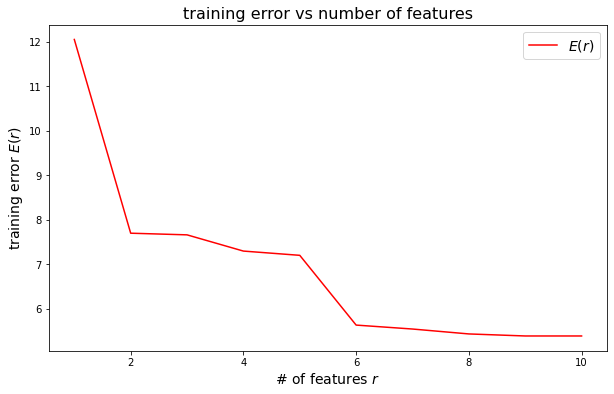

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

n = 10                        # maximum number of features used 

X,y = load_housing_data(n=n)  # read in 20 data points using n features 
linreg_error = np.zeros(n)    # vector for storing the training errors

for i in range(n): 
    reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
    reg = reg.fit(X[:,:(i+1)], y)    # find best linear predictor (minimize training error)
    pred = reg.predict(X[:,:(i+1)])    # compute predictions of best predictors 
    linreg_error[i] = mean_squared_error(y, pred)    # compute training error 

plot_x = np.linspace(1, n, n, endpoint=True)    # plot_x contains grid points for x-axis (1,...,n)

# Plot training error E(r) as a function of feature number r
plt.rc('legend', fontsize=14)    # Set font size for legends
plt.rc('axes', labelsize=14)     # Set font size for axis labels
plt.figure(figsize=(10,6))       # Set figure size
plt.plot(plot_x, linreg_error, label='$E(r)$', color='red')
plt.xlabel('# of features $r$')
plt.ylabel('training error $E(r)$')
plt.title('training error vs number of features', fontsize=16)
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split    # Import train_test_split function

# Load the data
X, y = load_housing_data(n=10) 

### STUDENT TASK ###
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

print(X.size)
print(X_train.size)
print(X_val.size)


200
160
40


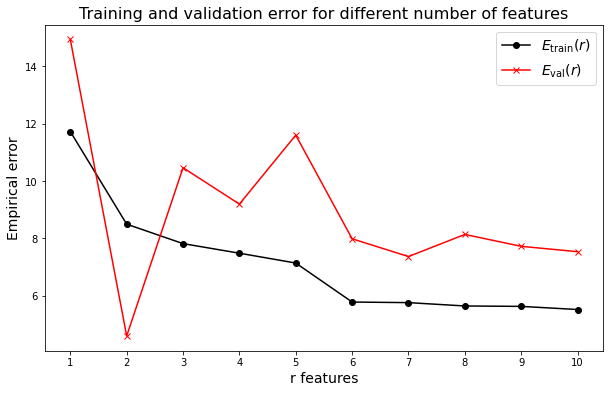

In [6]:
def get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros(n)    # Array for storing training errors
    err_val = np.zeros(n)    # Array for storing validation errors
    
    for i in range(n_features):    # Loop over the number of features r 
        reg = LinearRegression(fit_intercept=True)
        reg = reg.fit(X_train[:,:(i+1)], y_train)
        
        pred_train = reg.predict(X_train[:,:(i+1)])
        err_train[i] = mean_squared_error(y_train, pred_train)
    
        pred_val = reg.predict(X_val[:,:(i+1)])    # compute predictions of best predictors 
        err_val[i] = mean_squared_error(y_val, pred_val) #compute training error

    return err_train, err_val


# max number of features
n = 10
# Calculate training and validation errors using ´get_train_val_errors´
err_train, err_val = get_train_val_errors(X_train, X_val, y_train, y_val, n)

# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n + 1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n + 1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('Training and validation error for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')    # Set label for x-axis
plt.xticks(range(1, n + 1))  # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()


In [7]:
# Import KFold class from scikitlearn library
from sklearn.model_selection import KFold

K=5    # Specify the number of folds of split data into
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

# For all splits, print the validation and training indices
iteration = 0
for train_indices, test_indices in kf.split(X):
    iteration += 1
    X_train = X[train_indices,:]    # Get the training set    
    X_val = X[test_indices,:]    # Get the validation set
    print('Iteration {}:'.format(iteration))
    print('Indices for validation set:', test_indices)
    print('Indices for training set:', train_indices)
    print('X_val shape: {}, X_train shape: {} \n'.format(X_val.shape, X_train.shape))

Iteration 1:
Indices for validation set: [0 1 2 3]
Indices for training set: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 2:
Indices for validation set: [4 5 6 7]
Indices for training set: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 3:
Indices for validation set: [ 8  9 10 11]
Indices for training set: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 4:
Indices for validation set: [12 13 14 15]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 5:
Indices for validation set: [16 17 18 19]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
X_val shape: (4, 10), X_train shape: (16, 10) 



In [8]:
n = 10

X, y = load_housing_data(n=n)  # read in m data points with n features 

err_train = np.zeros(n)  # Array to store training errors
err_val = np.zeros(n)  # Array to store validation errors

K = 5
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

for r in range(n):
    train_errors_per_cv_iteration = np.zeros(K)  # List for storing the training errors for the splits
    val_errors_per_cv_iteration = np.zeros(K)  # List for storing the validation errors for the splits

    print("Number of features "+str(r))
    
    iteration = 0
    
    for train_indices, test_indices in kf.split(X):
        iteration += 1
        print("Iteration "+str(iteration))
        
        X_train = X[train_indices,:(r+1)]    # Get the training set    
        X_val = X[test_indices,:(r+1)]    # Get the validation set
        y_train = y[train_indices]
        y_val = y[test_indices]
    
        reg = LinearRegression(fit_intercept=True)
        reg.fit(X_train, y_train)
        
        pred_train = reg.predict(X_train)
        pred_val = reg.predict(X_val)
        
        train_errors_per_cv_iteration[iteration-1] = mean_squared_error(y_train, pred_train)
        val_errors_per_cv_iteration[iteration-1] = mean_squared_error(y_val, pred_val)
        
        print("Train error: ")
        print(train_errors_per_cv_iteration[iteration-1])
        print("Validation error: ")
        print(val_errors_per_cv_iteration[iteration-1])


    print("Train error: ")
    print(train_errors_per_cv_iteration)
    print("Train error mean: ")
    print(train_errors_per_cv_iteration.mean())
    
    print("Validation error: ")
    print(val_errors_per_cv_iteration)
    print("Validation error mean: ")
    print(val_errors_per_cv_iteration.mean())
        
       
    err_train[r] = train_errors_per_cv_iteration.mean()
    err_val[r] = val_errors_per_cv_iteration.mean()
    
    
print('Training errors for each K:')
print(err_train, '\n')
print('Validation error for each K:')
print(err_val, '\n')


# Perform sanity checks on the outputs
assert err_train.shape == (n,), "err_train is of the wrong shape!"
assert err_val.shape == (n,), "err_val is of the wrong shape!"
assert err_val[0] > err_val[1], "The second element of err_val should be larger than the first element!"

print("Sanity checks passed!")

Number of features 0
Iteration 1
Train error: 
13.227282757047497
Validation error: 
7.607184171668519
Iteration 2
Train error: 
11.075624779710092
Validation error: 
22.049195673453163
Iteration 3
Train error: 
7.744901512915016
Validation error: 
33.29614907732271
Iteration 4
Train error: 
13.93394355425252
Validation error: 
4.52783118002789
Iteration 5
Train error: 
11.892877986142047
Validation error: 
15.386994271761381
Train error: 
[13.22728276 11.07562478  7.74490151 13.93394355 11.89287799]
Train error mean: 
11.574926118013433
Validation error: 
[ 7.60718417 22.04919567 33.29614908  4.52783118 15.38699427]
Validation error mean: 
16.57347087484673
Number of features 1
Iteration 1
Train error: 
8.563836219869021
Validation error: 
4.739426734365439
Iteration 2
Train error: 
3.9352886589302543
Validation error: 
29.37421417526936
Iteration 3
Train error: 
5.797179902290605
Validation error: 
17.805331541788444
Iteration 4
Train error: 
9.175134290558148
Validation error: 
2.29

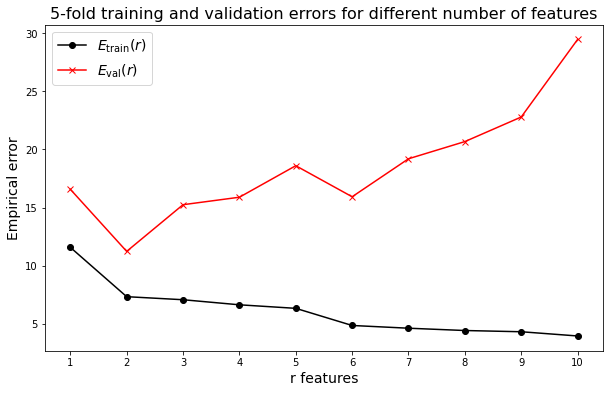

In [9]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n+1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n+1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('5-fold training and validation errors for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')         # Set label for x-axis
plt.xticks(range(1, n+1))      # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import Ridge

n = 10
X, y = load_housing_data(n)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test

alpha = 10    # Define value of the regularization parameter 'alpha'

ridge = Ridge(alpha=alpha, fit_intercept=True)    # Create Ridge regression model
ridge.fit(X_train, y_train)    # Fit the Ridge regression model on the training set
y_pred = ridge.predict(X_train)    # Predict the labels of the training set
w_opt = ridge.coef_    # Get the optimal weights (regression coefficients) of the fitted model
err_train = mean_squared_error(y_pred, y_train)    # Calculate the training error

# Print optimal weights and training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', err_train)

Optimal weights: 
 [ 1.62648008 -0.13079883  0.8888383  -0.58619617 -0.98729306  0.28057208
 -0.09922109  0.93619655 -0.14894959  0.13927532]
Training error: 
 13.682054265430258


In [13]:
from sklearn.linear_model import Lasso

X, y = load_housing_data(n)    # read in m data points using n features 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)    # 80% training and 20% test

def fit_lasso(X_train, y_train, alpha_val):
    lasso = Lasso(alpha=alpha_val, fit_intercept=True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_train)
    w_opt = lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
        
    return w_opt, training_error

# Set alpha value
alpha_val = 1

# Fit Lasso and calculate optimal weights and training error using the function 'fit_lasso'
w_opt, training_error = fit_lasso(X_train, y_train, alpha_val)

# Print optimal weights and the corresponding training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', training_error)

# Perform some sanity checks on the outputs
from sklearn.linear_model import Lasso
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opt' has wrong shape"
assert np.isscalar(training_error), "'training_error' is not scalar"
assert training_error < 1000, "'training_error' is too large"
print('Sanity check tests passed!')

Optimal weights: 
 [ 3.56106346 -0.13171416  0.         -0.         -0.          0.
 -0.          0.02624124  0.          0.        ]
Training error: 
 14.73183852484527
Sanity check tests passed!


Sanity check tests passed!


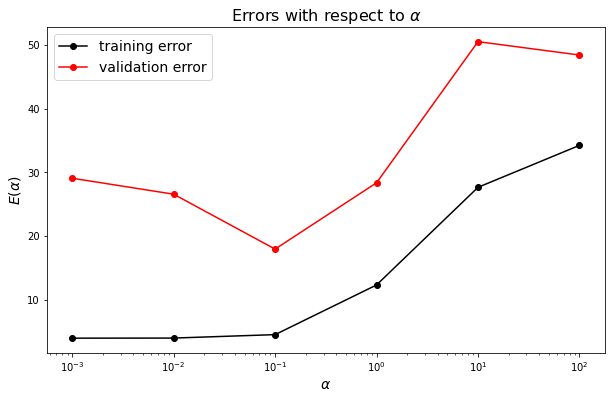

In [27]:
from sklearn.model_selection import GridSearchCV

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
### STUDENT TASK ###
n=10
X, y = load_housing_data(n)

params = {'alpha': alpha_values}
cv = 5
lasso = Lasso(fit_intercept=True)
gv = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_squared_error', cv=cv, return_train_score=True)
gv.fit(X, y)

err_train = gv.cv_results_['mean_train_score']
err_val = gv.cv_results_['mean_test_score']

err_train = err_train * -1
err_val = err_val * -1

# Perform some sanity checks on the outputs
assert err_train[0] > 0 and err_val[0] > 0, "Errors are negative!"
assert len(err_train) == len(alpha_values), "'err_train' has wrong shape"
assert len(err_val) == len(alpha_values), "'err_val' has wrong shape"
print('Sanity check tests passed!')

# Plot the training and validation errors
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(alpha_values, err_train, marker='o', color='black', label='training error')    # Plot training errors
plt.plot(alpha_values, err_val, marker='o', color='red', label='validation error')    # Plot validation errors
plt.xscale('log')    # Set x-axis to logarithmic scale
plt.xlabel(r'$\alpha$')    # Set label of x-axis
plt.ylabel(r'$E(\alpha)$')    # Set label of y-axis
plt.title(r'Errors with respect to $\alpha$', fontsize=16)    # Set title
plt.legend()    # Show legend
plt.show()